<h1>TRAFFIC SIGN RECOGNITION 🚦</h1>
    <p style = "font-family:arial;font-size:16px;">
    Traffic sign classification is the process of automatically recognizing traffic signs along the road, including speed limit signs, yield signs, merge signs, etc. Being able to automatically recognize traffic signs enables us to build “smarter cars”.
Self-driving cars need traffic sign recognition in order to properly parse and understand the roadway. Similarly, “driver alert” systems inside cars need to understand the roadway around them to help aid and protect drivers.
Traffic sign recognition is just one of the problems that computer vision and deep learning can solve.
    </p>



<img src="https://pyimagesearch.com/wp-content/uploads/2019/11/traffic_sign_classification_phases.jpg" style="width:500px;height:300px;">
    




<h1>⚠️DATA SET</h1>
<p style = "font-family:arial;font-size:16px;">
    The image dataset is consists of more than 50,000 pictures of various traffic signs(speed limit, crossing, traffic signals, etc.) Around 43 different classes are present in the dataset for image classification. The dataset classes vary in size like some class has very few images while others have a vast number of images.It contains two separate folders, train and test, where the train folder is consists of classes, and every category contains various images.where the test folder is consist of shuffled images of train folder.
    </p>

<h1>⚠️WORKFLOW</h1>
<p style = "font-family:arial;font-size:16px;">
We need to follow the below 4 steps to build our traffic sign classification model:
    </p>

<p><b>🛑Dataset exploration
    </b>
    </p>

<p><b>🛑CNN model building
    </b>
    </p>

<p><b>🛑Model training and validation
    </b>
    </p>

<p><b>🛑Model testing
   </b>
   </p>

<h1>⚠️DATA EXPLORATION</h1>
    <p style = "font-family:arial;font-size:16px;">
    Around 43 subfolders(ranging from 0 to 42) are available in our ‘train’ folder, and each subfolder represents a different class. We have an OS module that helps in the iteration of all the images with their respective classes and labels. To open the contents of ideas into an array, we are using the PIL library.
    </p>

<h1>⚠️IMPORT THE MODULES AND PACKAGES</h1>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import pathlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
import os
os.chdir('C:/Users/91638/Desktop/TrafficSignRecognition')

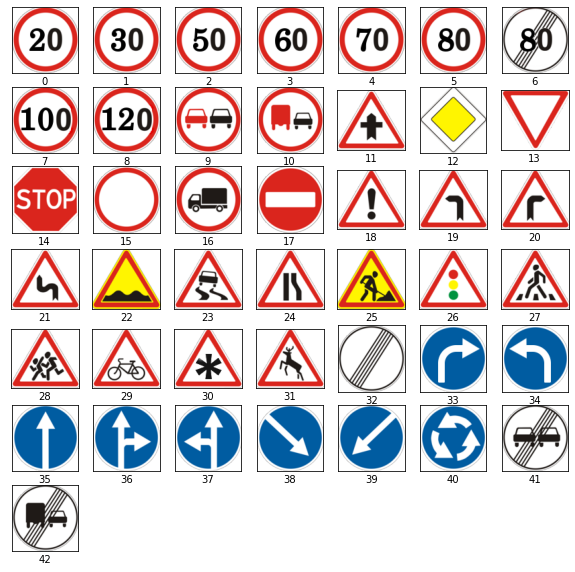

In [2]:
dir = 'C:/Users/91638/Desktop/TrafficSignRecognition'
    
plt.figure(figsize=(10, 10))
for i in range (0,43):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    path = dir + "/meta/{0}.png".format(i)
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(i)

In [3]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [4]:
#Preprocessing the images
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [5]:
#Now, we need to convert the image data list into NumPy array.
data = np.array(data) 
labels = np.array(labels)
print(data.shape, labels.shape) 

(39209, 30, 30, 3) (39209,)


In [6]:
data = np.array(data)
labels = np.array(labels)

In [7]:
np.save('./data',data)
np.save('./target',labels)

In [8]:
data=np.load('./data.npy')
labels=np.load('./target.npy')

In [9]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [10]:
#Now we need to split the data into training and testing.
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


<h1>⚠️IMAGE OF EACH CLASS</h1>

<Figure size 360x360 with 0 Axes>

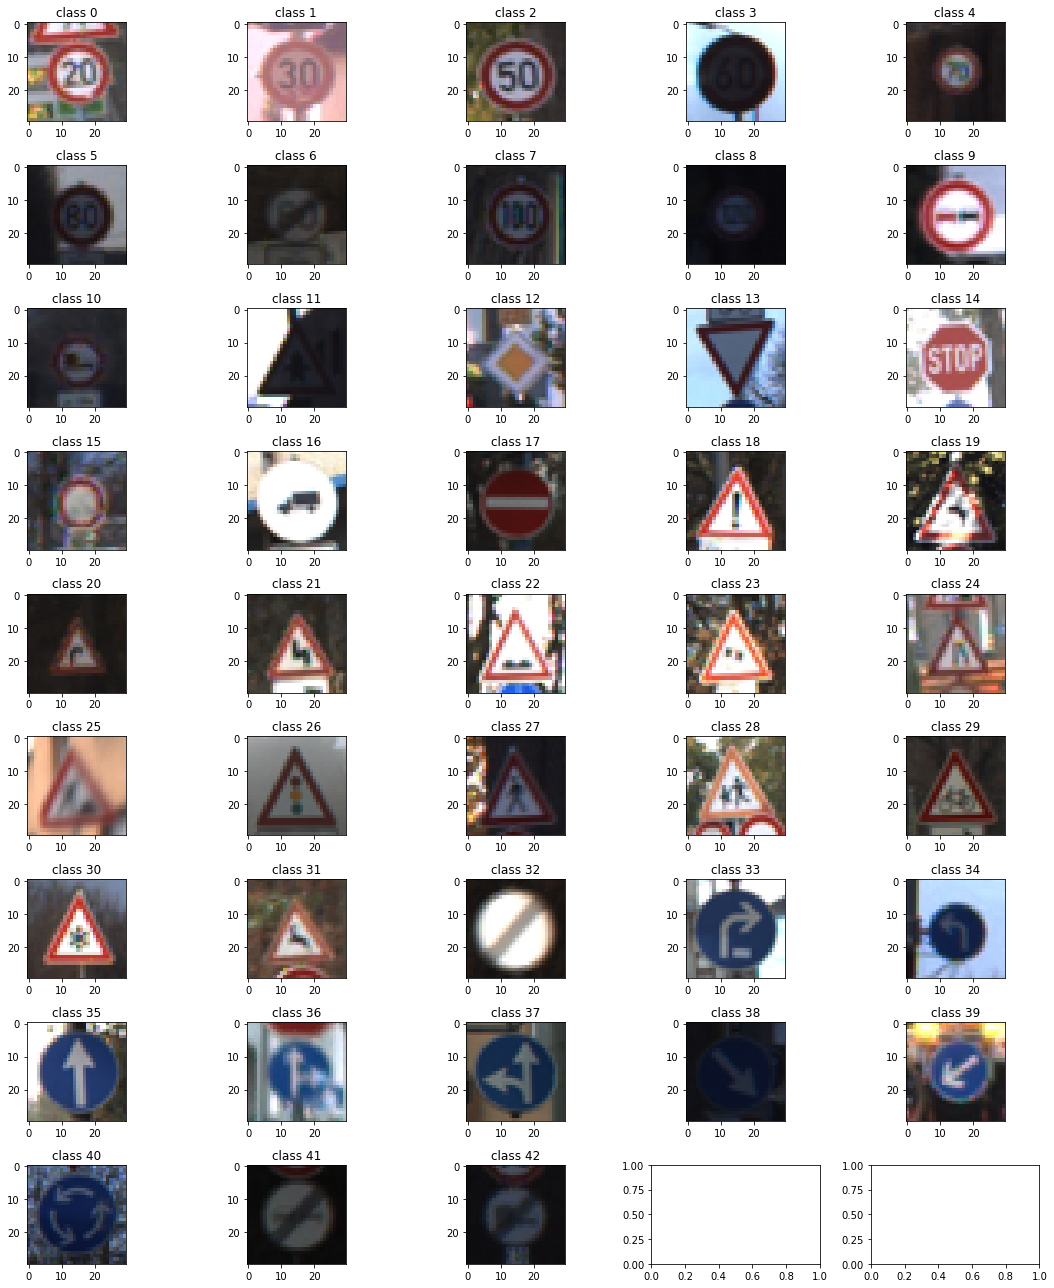

In [12]:
plt.rcParams["figure.figsize"] = [15,18]

fig = plt.figure(figsize=(5,5))
f, axarr = plt.subplots(9, 5)
plts = np.reshape(axarr, -1)

#display one sample from all class
for classId in np.unique(y_train):
    thePicIndex = np.where(y_train == classId)[0]
    myplt = plts[classId]
    myplt.imshow(X_train[thePicIndex[25]])
    myplt.set_title("class " + str(classId))
    
plt.tight_layout()

In [13]:
#Now convert labels into one hot encoding.
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

<h1>⚠️CNN MODEL</h1>
<p style = "font-family:arial;font-size:16px;">
    We build a CNN model to classify the images into their respective categories.
The architecture of our model is:
    </p>

<p><b>2 Conv2D layer (filter=32, kernel_size=(5,5), activation=”relu”)
    </b>
    </p>

<p><b>MaxPool2D layer ( pool_size=(2,2))
    </b>
    </p>

<p><b>Dropout layer (rate=0.25)
    </b>
    </p>
    
<p><b>2 Conv2D layer (filter=64, kernel_size=(3,3), activation=”relu”)
    </b>
    </p>

<p><b>MaxPool2D layer ( pool_size=(2,2))
    </b>
    </p>

<p><b>Dropout layer (rate=0.25)
    </b>
    </p>

<p><b>Dense Fully connected layer (256 nodes, activation=”relu”)
    </b>
    </p>

<p><b>Dropout layer (rate=0.5)
    </b>
    </p>

<p><b>Dense layer (43 nodes, activation=” softmax”)
    </b>
    </p>

In [14]:
#Now, it's time to build the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [16]:
#Let's compile & train the model.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
aug=ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,           
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

<h1>⚠️MODEL TRAINING AND VALIDATION</h1>
<p style = "font-family:arial;font-size:16px;">
To train our model, we will use the model.fit() method that works well after the successful building of model architecture. we got more than 90% accuracy on training sets and acquired stability after 20 epochs.
    </p>

In [18]:
#The epoch result
epochs = 20
history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 75s 75ms/step - loss: 2.4234 - accuracy: 0.3495 - val_loss: 0.8981 - val_accuracy: 0.7091
Epoch 2/20
981/981 [==============================] - 74s 75ms/step - loss: 1.0576 - accuracy: 0.6785 - val_loss: 0.3009 - val_accuracy: 0.9152
Epoch 3/20
981/981 [==============================] - 74s 75ms/step - loss: 0.6619 - accuracy: 0.8062 - val_loss: 0.1736 - val_accuracy: 0.9457
Epoch 4/20
981/981 [==============================] - 77s 78ms/step - loss: 0.5396 - accuracy: 0.8459 - val_loss: 0.1351 - val_accuracy: 0.9605
Epoch 5/20
981/981 [==============================] - 75s 76ms/step - loss: 0.4453 - accuracy: 0.8781 - val_loss: 0.0797 - val_accuracy: 0.9760
Epoch 6/20
981/981 [==============================] - 77s 78ms/step - loss: 0.4066 - accuracy: 0.8880 - val_loss: 0.1480 - val_accuracy: 0.9577
Epoch 7/20
981/981 [==============================] - 76s 77ms/step - loss: 0.3760 - accuracy: 0.8980 - val_loss: 0.0502 - val_accuracy:

<h1>⚠️PLOTING GRAPH FOR ACCURACY</h1>


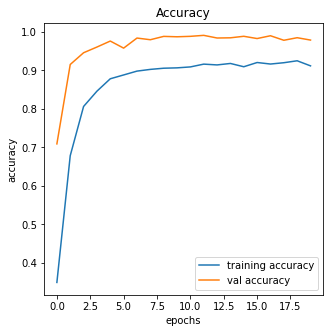

In [19]:
plt.figure(figsize =(5, 5))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

<h1>⚠️MODEL TESTING</h1>
<p style = "font-family:arial;font-size:16px;">
    A folder named” test” is available in our dataset; inside that, we got the main working comma-separated file called” test.csv”. It comprises two things, the image paths, and their respective class labels. We can use the pandas’ python library to extract the image path with corresponding labels. Next, we need to resize our images to 30×30 pixels to predict the model and create a numpy array filled with image data. To understand how the model predicts the actual labels, we need to import accuracy_score from the sklearn.metrics. At last, we are calling the Keras model.save() method to keep our trained model.
    </p>

In [20]:
#Let's do testing on Test data
def testing(Testcsv):
    y_test = pd.read_csv(Testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [21]:
X_test, label = testing("Test.csv")

In [22]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

395/395 [==============================] - 5s 13ms/step


<h1>⚠️ACCURACY SCORE</h1>

In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, classes_x))

0.9501187648456056


<h1>⚠️SAVE THE MODEL</h1>

In [24]:
model.save("./TSR.h5")

<h1>⚠️TESTING THE MODEL BY RANDOM</h1>

In [25]:
import os
os.chdir(r'C:/Users/91638/Desktop/TrafficSignRecognition')
from keras.models import load_model
model = load_model('./TSR.h5')

In [26]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [27]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    predict_x=model.predict(X_test) 
    classes_x=np.argmax(predict_x,axis=1)
    return image,classes_x

1/1 [==============================] - 0s 46ms/step
Predicted traffic sign is:  Veh > 3.5 tons prohibited


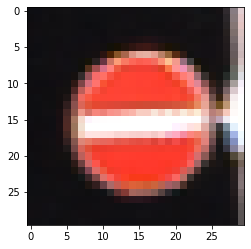

In [41]:
plot,prediction = test_on_img(r"C:\Users\91638\Desktop\TrafficSignRecognition\Test\00035.png")
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.figure(figsize=(4,4))
plt.imshow(plot) 
plt.show()

In [29]:
#pip install tkinter

<h1>⚠️GUI FOR TRAFFIC SIGN RECOGNITION</h1>
<p style = "font-family:arial;font-size:16px;">
We will use a standard python library called Tkinter to build a graphical user interface(GUI) for our traffic signs recognizer.  To predict the traffic sign, we need to provide the same resolutions of shape we used at the model training time.             The model.predict_classes(image) function is used for image prediction, it returns the class number(0-42) for every image.
Then, we can extract the information from the dictionary using this class number.
    </p>

In [30]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
#load the trained model to classify sign
from keras.models import load_model
model = load_model('./TSR.h5')
#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
           2:'Speed limit (30km/h)',
           3:'Speed limit (50km/h)',
           4:'Speed limit (60km/h)',
           5:'Speed limit (70km/h)',
           6:'Speed limit (80km/h)',
           7:'End of speed limit (80km/h)',
           8:'Speed limit (100km/h)',
           9:'Speed limit (120km/h)',
           10:'No passing',
           11:'No passing veh over 3.5 tons',
           12:'Right-of-way at intersection',
           13:'Priority road',
           14:'Yield',
           15:'Stop',
           16:'No vehicles',
           17:'Veh > 3.5 tons prohibited',
           18:'No entry',
           19:'General caution',
           20:'Dangerous curve left',
           21:'Dangerous curve right',
           22:'Double curve',
           23:'Bumpy road',
           24:'Slippery road',
           25:'Road narrows on the right',
           26:'Road work',
           27:'Traffic signals',
           28:'Pedestrians',
           29:'Children crossing',
           30:'Bicycles crossing',
           31:'Beware of ice/snow',
           32:'Wild animals crossing',
           33:'End speed + passing limits',
           34:'Turn right ahead',
           35:'Turn left ahead',
           36:'Ahead only',
           37:'Go straight or right',
           38:'Go straight or left',
           39:'Keep right',
           40:'Keep left',
           41:'Roundabout mandatory',
           42:'End of no passing',
           43:'End no passing vehicle with a weight greater than 3.5 tons' }
#initialise GUI
top=tk.Tk()
top.geometry('600x500')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top,font=('arial',30,'bold'))
def classify(file_path):
   global label_packed
   image = Image.open(file_path)
   image = image.resize((30,30))
   image = numpy.expand_dims(image, axis=0)
   image = numpy.array(image)
   predict_model=model.predict([image])[0] 
   classes_model=np.argmax(predict_model,axis=0)
   sign = classes[classes_model+1]
   print(sign)
   label.configure(foreground='#011638', text=sign)
def show_classify_button(file_path):
   classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
   classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
   classify_b.place(relx=0.79,rely=0.46)
def upload_image():
    try:
       file_path=filedialog.askopenfilename()
       uploaded=Image.open(file_path)
       uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
       im=ImageTk.PhotoImage(uploaded)
       sign_image.configure(image=im)
       sign_image.image=im
       label.configure(text='')
       show_classify_button(file_path)
    except:
       pass
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="CHECK TRAFFIC SIGN",pady=20, font=('arial',30,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

<h1>⚠️SAMPLE FOR GUI</h1>
<img src="https://editor.analyticsvidhya.com/uploads/88470Screenshot%20(122).png" style="width:500px;height:300px;">

<h1>⚠️CONCLUSION</h1>
<p style = "font-family:arial;font-size:16px;">
we created a CNN model to identify traffic signs and classify them with more than 90% accuracy.GUI of this model makes it easy to understand how signs are classified into several classes.
    </p>

<h1>⚠️REFERENCE</h1>
<p style = "font-family:arial;font-size:20px;">
<b>Dataset:
    </b>
    </p>
    https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

<p style = "font-family:arial;font-size:20px;">
<b>Coding:
    </b>
    </p>
    https://www.machinelearninghub.net/post/traffic-signs-classification-using-deep-learning-flask
    